In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
# STEP 1: Load Dataset
df = pd.read_csv('IIM_MBA_Admission_Prediction.csv')
print("Dataset Loaded Successfully!")
df.tail()

Dataset Loaded Successfully!


,Registration ID,Candidate Name,CAT Score,Percentile,Bachelor's Degree Marks,Admission Status
121,IIM20250122,Aarav Mehta,93.2,96.1,66,Not Admitted
122,IIM20250123,Rohit Verma,98.3,100.0,72,Not Admitted
123,IIM20250124,Rohit Sharma,87.4,93.8,85,Not Admitted
124,IIM20250125,Rohit Sharma,98.0,98.9,65,Not Admitted
125,IIM20250126,Kriti Gupta,87.8,91.5,74,Not Admitted


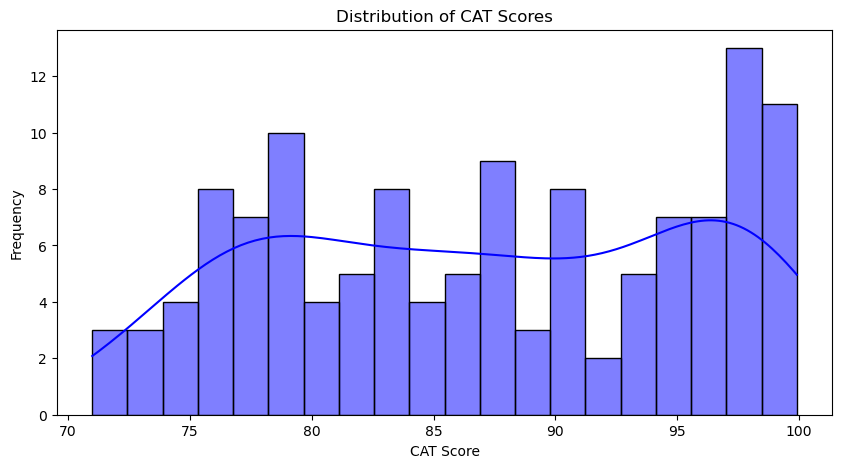

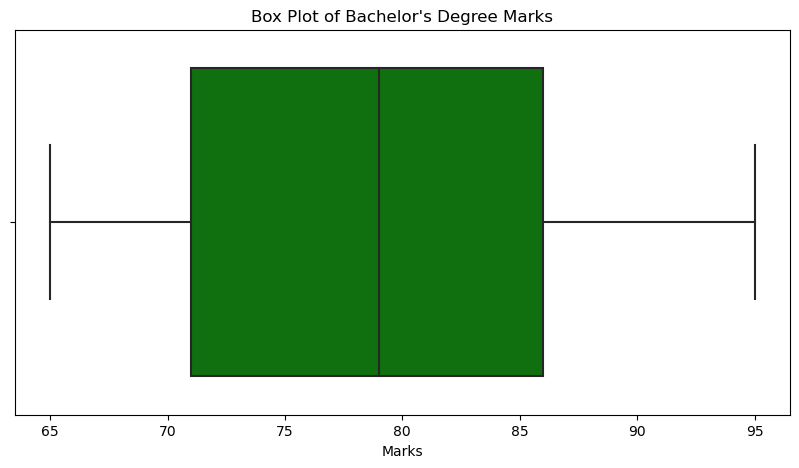

C:\Users\patha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


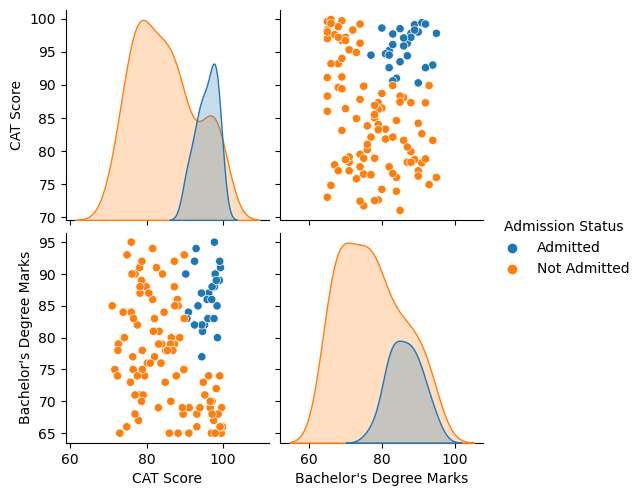

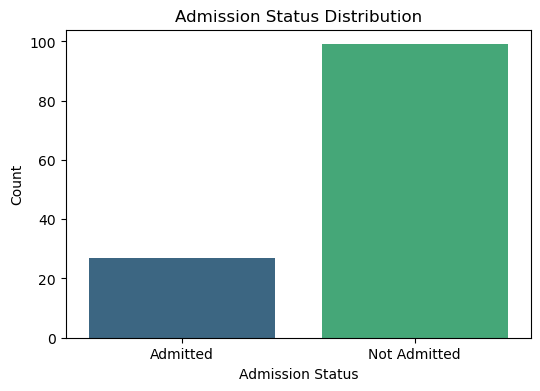

In [7]:
# STEP 2: Data Visualization
plt.figure(figsize=(10,5))
sns.histplot(df['CAT Score'], kde=True, bins=20, color='blue')
plt.title('Distribution of CAT Scores')
plt.xlabel('CAT Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=df["Bachelor's Degree Marks"], color='green')
plt.title("Box Plot of Bachelor's Degree Marks")
plt.xlabel("Marks")
plt.show()

sns.pairplot(df[['CAT Score', "Bachelor's Degree Marks", 'Admission Status']], hue='Admission Status')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Admission Status', data=df, palette='viridis')
plt.title('Admission Status Distribution')
plt.xlabel('Admission Status')
plt.ylabel('Count')
plt.show()

In [8]:
# STEP 3: Data Preprocessing
# Handle missing values
df = df.dropna()

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features (X) and target variable (y)
X = df[['CAT Score', "Bachelor's Degree Marks"]]
y = df['Admission Status']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Data Preprocessing Completed!")    

Data Preprocessing Completed!


In [9]:
# STEP 4: Apply Admission Formula
df['Admission Status'] = ((df['CAT Score'] * 0.7 + df["Bachelor's Degree Marks"] * 0.3) > 60).astype(int)

In [10]:
# STEP 5: Train the Model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Model Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        20

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



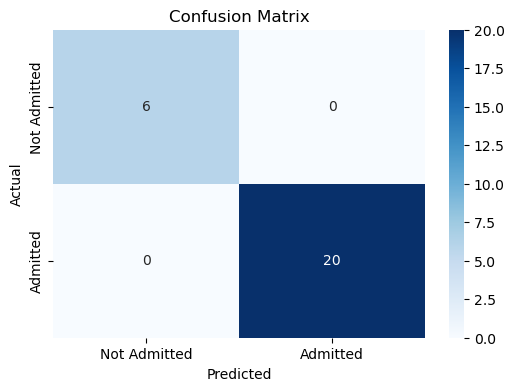

In [11]:
# STEP 6: Display Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Not Admitted", "Admitted"], 
            yticklabels=["Not Admitted", "Admitted"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
# STEP 7: Function for User Input Prediction
def predict_admission():
    try:
        cat_score = float(input("Enter your CAT score: "))
        bachelors_marks = float(input("Enter your Bachelor's marks: "))
        
        # Scale the user input
        user_input = np.array([[cat_score, bachelors_marks]])
        user_input_scaled = scaler.transform(user_input)
        
        # Predict using the trained model
        prediction = model.predict(user_input_scaled)
        result = "Admitted" if prediction[0] == 1 else "Not Admitted"
        print(f"\nPrediction: {result}\n")
    except ValueError:
        print("Invalid input! Please enter numerical values.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Run the function
predict_admission()

print("User  Prediction Function Ready!")

Enter your CAT score: 90
Enter your Bachelor's marks: 87

Prediction: Admitted

User  Prediction Function Ready!


C:\Users\patha\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
